In [1]:
#import all the dependancies to create the model
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, roc_curve, auc, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in the training set data
training_set = pd.read_csv("training_set.csv")
#map the result to be 1 for home win, 0 for home loss
training_set['HomeResult'] = training_set['HomeResult'].map({'Won': 1, 'Lost': 0})
#result has the result of the game (Y input fo the model)
result = training_set["HomeResult"]
#data dataframe has all of the inputs for the model
data = training_set.iloc[:, 7:]
#info dataframe has all the info for the games
info = training_set.iloc[:, :7]
info.head()

,Game,Date,AwayTeam,AwayScore,HomeTeam,HomeScore,HomeResult
0,"2021-11-05 - NSH 3, VAN 2",2021-11-05,NSH,3,VAN,2,0
1,"2021-11-05 - ARI 1, ANA 3",2021-11-05,ARI,1,ANA,3,1
2,"2021-11-06 - DET 4, BUF 3",2021-11-06,DET,4,BUF,3,0
3,"2021-11-06 - VGK 5, MTL 2",2021-11-06,VGK,5,MTL,2,0
4,"2021-11-06 - TB 5, OTT 3",2021-11-06,TB,5,OTT,3,0


In [3]:
# Load input data and results
training_set = pd.read_csv('training_set.csv')
X = data
y = result

#Split the dataset into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create the scaler and scale the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#train the model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

#use the .predict function to predict the result and the .predict_proba to get the probabilsitic outcomes
predicted_labels = svm_model.predict(X_test_scaled)
probabilities = svm_model.predict_proba(X_test_scaled)

#Create a dataframe with the results
results_df = pd.DataFrame(probabilities, columns=[f'Prob_{label}' for label in svm_model.classes_])
results_df['Predicted Label'] = predicted_labels

print(results_df.head())

     Prob_0    Prob_1  Predicted Label
0  0.329518  0.670482                1
1  0.488999  0.511001                1
2  0.485105  0.514895                1
3  0.389915  0.610085                1
4  0.613077  0.386923                0


In [4]:
import joblib

#save the model and scalers as .joblib files for later use
joblib.dump(svm_model, 'svm_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [5]:
#Calculate Log Loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

Log Loss: 0.6649565042366139


Log Loss: 0.6649565042366139


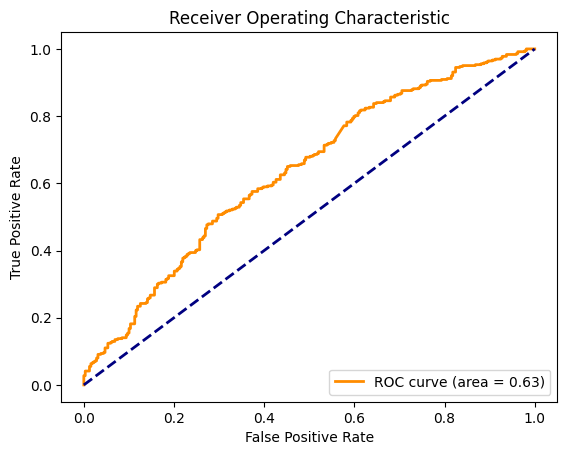

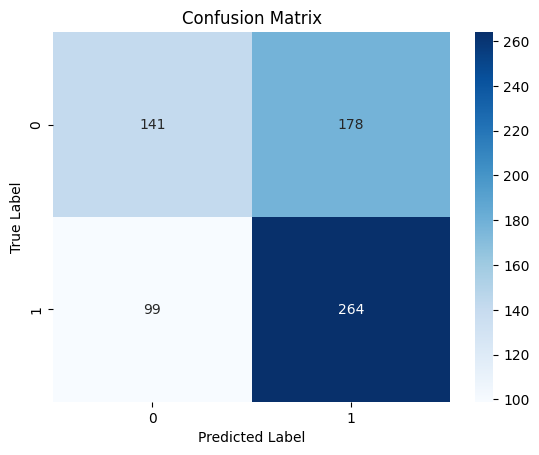

              precision    recall  f1-score   support

     Class 0       0.59      0.44      0.50       319
     Class 1       0.60      0.73      0.66       363

    accuracy                           0.59       682
   macro avg       0.59      0.58      0.58       682
weighted avg       0.59      0.59      0.59       682

Accuracy: 0.59


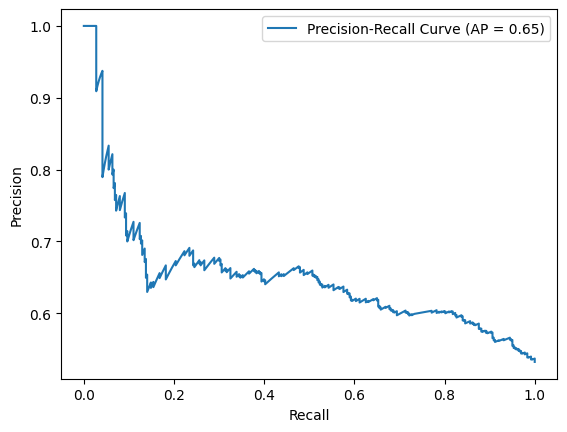

Cross-Validation Scores: [0.59824047 0.58211144 0.5659824  0.60117302 0.59765051]
Mean CV Accuracy: 0.59


In [6]:
#Metrics
#Log loss
logloss = log_loss(y_test, probabilities)
print(f"Log Loss: {logloss}")

#ROC and AUC Curves
y_probs = probabilities[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report

report = classification_report(y_test, predicted_labels, target_names=[f'Class {label}' for label in svm_model.classes_])
print(report)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, probabilities[:, 1])
avg_precision = average_precision_score(y_test, probabilities[:, 1])

plt.plot(recall, precision, label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y, cv=5, scoring='accuracy')  # Change scoring as needed
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Accuracy: {scores.mean():.2f}")

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.show()